<a href="https://colab.research.google.com/github/mobinym/Exercises/blob/main/SingleVariable_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

In [ ]:
X = np.array([1,5,8,10,15,19,16,17,15,36]).reshape(-1,1)
y = np.array([2,6,9,11,16,20,17,18,16,37])

array([ 2,  6,  9, 11, 16, 20, 17, 18, 16, 37])

In [ ]:
model = LinearRegression()
model.fit(X,y)

print(model.intercept_)
print(model.coef_)



0.9999999999999964
[1.]


In [ ]:
y_pred = model.predict(X)

mse = mean_squared_error(y,y_pred)
R2 = r2_score(y,y_pred)
print(mse)
print(R2)

2.450399186842768e-30
1.0


In [ ]:
new_X = np.array([23,24,16,18,19,10,8,50,4]).reshape(-1,1)
predicet_y = model.predict(new_X)


array([24., 25., 17., 19., 20., 11.,  9., 51.,  5.])

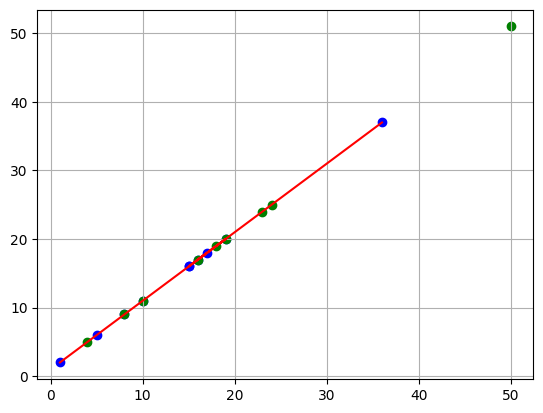

In [ ]:
plt.scatter(X , y , color = 'blue')
plt.plot(X, y_pred , color = 'red')
plt.scatter(new_X,predicet_y,color = 'green')
plt.grid(True)

Function without Sklearn


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def normal_equation(X,y):
  theta = np.linalg.inv(X.T @ X) @ X.T @ y    # @ = np.dot()
  return theta



def mean_squared_error(y,y_pred):
  return np.mean((y-y_pred) ** 2)


def r2_score(y,y_pred):
  ssres = np.sum((y-y_pred)**2)
  sstot = np.sum((y-np.mean(y))**2)
  return 1 - (ssres / sstot)

In [ ]:
X = np.array([1,5,8,10,15,19,16,17,15,36]).reshape(-1,1)
y = np.array([2,6,9,11,16,20,17,18,16,37])
X = np.c_[np.ones((X.shape[0],1)),X]

In [ ]:
theta = normal_equation(X,y)
print(theta)

[1. 1.]


In [ ]:
y_pred = np.dot(X,theta)
mse = mean_squared_error(y,y_pred)
r2 = r2_score(y,y_pred)
print(mse)
print(r2)

5.451521893142955e-29
1.0


In [ ]:
new_X  = np.array([20,25,40,46,80,75]).reshape(-1,1)
new_X  = np.c_[np.ones((new_X.shape[0],1)),new_X]

predicet_y = np.dot(new_X,theta)


array([21., 26., 41., 47., 81., 76.])

Gradient Descent


In [ ]:
def hypothesis(theta,X):
   return np.dot(X, theta)

def cost_function(theta,X,y):
  m = len(y)
  j= np.sum((hypothesis(theta, X)-y)**2)/(2*m)
  return j


def gradient_descent(theta , X , y , learning_rate, iterations):
  m= len(y)
  cost_history = np.zeros(iterations)
  for i in range (iterations):
    gradient = np.dot(X.T,(hypothesis(theta,X) - y)) / m
    theta = theta - (learning_rate * gradient)
    cost_history[i] = cost_function(theta , X , y)
  return theta, cost_history


def mean_squared_error(y,y_pred):
  return np.mean((y-y_pred) ** 2)

def r2_score(y,y_pred):
  ssres = np.sum((y-y_pred)**2)
  sstot = np.sum((y-np.mean(y))**2)
  return 1 - (ssres / sstot)

In [ ]:
X = np.array([1,5,8,10,15,19,16,17,15,36]).reshape(-1,1)
y = np.array([2,6,9,11,16,20,17,18,16,37])
X = np.c_[np.ones((X.shape[0],1)),X]


initia_theta = np.zeros(X.shape[1])
learning_rate = 0.0001
iterations = 1000


theta , cost_history = gradient_descent(initia_theta,X,y,learning_rate,iterations)

y_pred = hypothesis(theta,X)
mse = mean_squared_error(y,y_pred)
r2 = r2_score(y,y_pred)

print(mse)
print(r2)


0.24617241934121062
0.9970182604246461


In [ ]:
cur_x = 3 # The algorithm starts at x=3
rate = 0.01 # Learning rate
precision = 0.000001 #This tells us when to stop the algorithm
previous_step_size = 1 #
max_iters = 10000 # maximum number of iterations
iters = 0 #iteration counter
df = lambda x: 2*(x+5) #Gradient of our function

while previous_step_size > precision and iters < max_iters:
    prev_x = cur_x #Store current x value in prev_x
    cur_x = cur_x - rate * df(prev_x) #Grad descent
    previous_step_size = abs(cur_x - prev_x) #Change in x
    iters = iters+1 #iteration count
    print("Iteration",iters,"\nX value is",cur_x) #Print iterations

print("The local minimum occurs at", cur_x)

<function __main__.<lambda>(x)>

# `USE SEABORN DATASET`

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = sns.load_dataset('tips')
df.head()
df.isnull().sum()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
X = df[['total_bill']]
y = df[['tip']]

X = np.c_[np.ones((X.shape[0],1)),X]

model = LinearRegression()

model.fit(X,y)

print(model.intercept_)
print(model.coef_)

[0.92026961]
[[0.         0.10502452]]


In [ ]:
y_pred = model.predict(X)


mse = mean_squared_error(y,y_pred)
r2 = r2_score(y,y_pred)

print(mse)
print(r2)

1.036019442011377
0.45661658635167657
